In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [27]:
data = pd.read_csv('abstract_adaptation_pair_df.csv')
data_2 = pd.read_csv('questions_specialties_df.csv')

In [3]:
data.head()

,abstract,adaptation,question,category,question_type
0,Muscle cramps are a common problem characteriz...,Muscle cramps are a common problem represented...,What causes muscle spasm?,1,C
1,The dystonias are a group of disorders charact...,Dystonias are disorders with a lot of uncontro...,What causes muscle spasm?,1,C
2,"Muscle cramps result in continuous, involuntar...",Muscle cramps cause constant and unintended co...,What causes muscle spasm?,1,C
3,Exercise-Associated Muscle Cramps (EAMC) are a...,Exercise-Associated Muscle Cramps (EAMC) are a...,What causes muscle spasm?,1,C
4,Muscular cramp is a common symptom in healthy ...,"Muscle cramps are common in healthy people, es...",What causes muscle spasm?,1,C


In [28]:
data_2.head()

,id,question,type,specialties
0,1,What causes muscle spasm?,clinical,Musculoskeleton
1,2,What does duloxetine do?,biological,Mental Health
2,3,How can i reduce my potassium levels?,clinical,Endocrinology
3,4,How is diabetes diagnosed?,clinical,Endocrinology
4,5,How to treat a bakers cyst?,clinical,Dermatology


In [201]:
counts = Counter(data_2['type'])
labels = ["clinical", "biological"]
values = [counts['clinical'], counts['biological']]

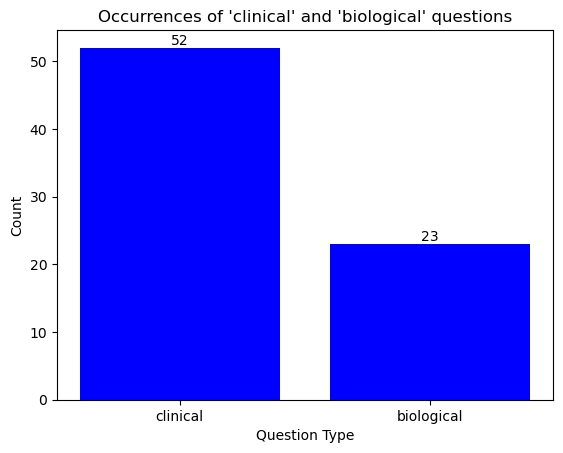

In [202]:
# Create the bar chart
plt.bar(labels, values, color=['blue', 'blue'])

# Add labels and a title
plt.xlabel("Question Type")
plt.ylabel("Count")
plt.title("Occurrences of 'clinical' and 'biological' questions")

# Add labels on top of the bars
for i, v in enumerate(values):
    plt.text(labels[i], v, str(v), ha='center', va='bottom')

# Display the bar chart
plt.show()

In [71]:
spec_count = Counter(data_2['specialties'])
spec_labels = list(spec_count.keys())
spec_values = list(spec_count.values())

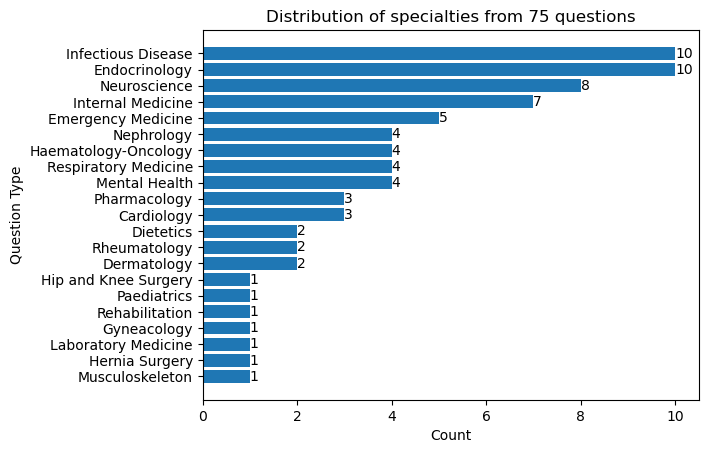

In [72]:
# Sort the data in descending order
sorted_data = sorted(zip(spec_labels, spec_values), key=lambda x: x[1], reverse=False)
spec_labels, spec_values = zip(*sorted_data)

# Create the bar chart
plt.barh(spec_labels, spec_values)

# Add labels and a title
plt.ylabel("Question Type")
plt.xlabel("Count")
plt.title("Distribution of specialties from 75 questions")

# Add labels to the bars
for i, v in enumerate(spec_values):
    plt.text(v, i, str(v), color='black', va='center')

# Display the bar chart
plt.show()

In [78]:
from textstat import flesch_reading_ease, flesch_kincaid_grade
from tabulate import tabulate

In [75]:
abstract_fkgl = []
abstract_fkre = []
adapt_fkgl = []
adapt_fkre = []

for row in data.itertuples():
    abstract_fkgl.append(flesch_kincaid_grade(row.abstract))
    abstract_fkre.append(flesch_reading_ease(row.abstract))
    adapt_fkgl.append(flesch_kincaid_grade(row.adaptation))
    adapt_fkre.append(flesch_reading_ease(row.adaptation))


In [143]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import word_tokenize
import evaluate

nltk.download('punkt')
smooter = SmoothingFunction()
rouge_evaluate = evaluate.load('rouge')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/changsiang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [158]:
bleu = []

for row in data.itertuples():
    abstract_token = word_tokenize(row.abstract)
    adapt_token = word_tokenize(row.adaptation)
    bleu.append(sentence_bleu([adapt_token], abstract_token, smoothing_function=smooter.method1))



In [149]:
references = [ [a] for a in data['abstract']]

rouge_score = rouge_evaluate.compute(predictions=data.adaptation, references=references, tokenizer=word_tokenize)


In [159]:
abstract_fkgl_mean = np.mean(abstract_fkgl)
abstract_fkre_mean = np.mean(abstract_fkre)
abstract_fkgl_median = np.median(abstract_fkgl)
abstract_fkre_median = np.median(abstract_fkre)
adapt_fkgl_mean = np.mean(adapt_fkgl)
adapt_fkre_mean = np.mean(adapt_fkre)
adapt_fkgl_median = np.median(adapt_fkgl)
adapt_fkre_median = np.median(adapt_fkre)

In [160]:
table = [
    ['BLEU', np.mean(bleu)],
    ['ROUGE (Sum)', rouge_score['rougeLsum']]
]
header = ['Metric', 'Score']
print(tabulate(table, headers=header, tablefmt='orgtbl'))


| Metric      |    Score |
|-------------+----------|
| BLEU        | 0.308804 |
| ROUGE (Sum) | 0.532603 |


In [114]:
table = [
    ['FKGL', abstract_fkgl_mean, abstract_fkgl_median, adapt_fkgl_mean, adapt_fkgl_median],
    ['FKRE', abstract_fkre_mean, abstract_fkre_median, adapt_fkre_mean, adapt_fkre_median],
]
header = ['Metric', 'Original_Mean', 'Original_Median', 'Adaptation_Mean', 'Adaptation_Median']
table = tabulate(table, headers=header, tablefmt='orgtbl')
print(table)

| Metric   |   Original_Mean |   Original_Median |   Adaptation_Mean |   Adaptation_Median |
|----------+-----------------+-------------------+-------------------+---------------------|
| FKGL     |         13.8021 |             13.9  |           11.6064 |               11.4  |
| FKRE     |         32.2564 |             31.78 |           47.9856 |               47.28 |


In [123]:
gpt_df = pd.read_csv('chatgpt_examples.csv')

In [124]:
gpt_df.head()

,input_text,target_text,prompt1,prompt2,prompt3
0,"Background: Muscle cramp is a painful, involun...",Muscle cramps are unconscious contractions of ...,"Muscle cramps, those painful muscle contractio...",This study looked into why exercise-associated...,Muscle cramps are when your muscles suddenly t...
1,Hyperkalemia is a frequent clinical abnormalit...,Hyperkalemia (high blood potassium) is common ...,Hyperkalemia is a common problem in people wit...,"Hyperkalemia, which is when there's too much p...",Hyperkalemia is a common problem in people wit...
2,New recommendations for the classification and...,New recommendations for classifying diabetes m...,The new guidelines for classifying and diagnos...,New guidelines for classifying and diagnosing ...,There are new guidelines for how we talk about...
3,Objective: To describe the historical refineme...,"Our objective is to summarize the history, und...","This text discusses the history, development, ...",Objective: This article aims to provide an ove...,This article discusses the history and science...
4,The chemical structure of a neuroleptic does n...,The chemical structure (arrangement of chemica...,The chemical structure of a neuroleptic drug d...,The chemical structure of a neuroleptic medica...,When it comes to medications that help with me...


In [125]:
input_fkgl = []
input_fkre = []
target_fkgl = []
target_fkre = []
prompt1_fkgl = []
prompt1_fkre = []
prompt2_fkgl = []
prompt2_fkre = []
prompt3_fkgl = []
prompt3_fkre = []

In [126]:
for row in gpt_df.itertuples():
    input_fkgl.append(flesch_kincaid_grade(row.input_text))
    input_fkre.append(flesch_reading_ease(row.input_text))
    target_fkgl.append(flesch_kincaid_grade(row.target_text))
    target_fkre.append(flesch_reading_ease(row.target_text))
    prompt1_fkgl.append(flesch_kincaid_grade(row.prompt1))
    prompt1_fkre.append(flesch_reading_ease(row.prompt1))
    prompt2_fkgl.append(flesch_kincaid_grade(row.prompt2))
    prompt2_fkre.append(flesch_reading_ease(row.prompt2))
    prompt3_fkgl.append(flesch_kincaid_grade(row.prompt3))
    prompt3_fkre.append(flesch_reading_ease(row.prompt3))

In [127]:
table = [
    ['FKGL', np.mean(input_fkgl), np.mean(target_fkgl), np.mean(prompt1_fkgl), np.mean(prompt2_fkgl), np.mean(prompt3_fkgl)],
    ['FKRE', np.mean(input_fkre), np.mean(target_fkre), np.mean(prompt1_fkre), np.mean(prompt2_fkre), np.mean(prompt3_fkre)],
]
header = ['Metric', 'Input_Mean', 'Target_Mean', 'Prompt1_Mean', 'Prompt2_Mean', 'Prompt3_Mean']
table = tabulate(table, headers=header, tablefmt='orgtbl')
print(table)

| Metric   |   Input_Mean |   Target_Mean |   Prompt1_Mean |   Prompt2_Mean |   Prompt3_Mean |
|----------+--------------+---------------+----------------+----------------+----------------|
| FKGL     |      14.3667 |       10.9833 |          11.25 |        12.0167 |        7.91667 |
| FKRE     |      30.1167 |       48.7567 |          47.21 |        41.5533 |       70.21    |


In [168]:
target_bleu = []
prompt1_bleu = []
prompt2_bleu = []
prompt3_bleu = []

for row in gpt_df.itertuples():
    input_token = word_tokenize(row.input_text)
    target_token = word_tokenize(row.target_text)
    prompt1_token = word_tokenize(row.prompt1)
    prompt2_token = word_tokenize(row.prompt2)
    prompt3_token = word_tokenize(row.prompt3)
    target_bleu.append(sentence_bleu([target_token], input_token, smoothing_function=smooter.method1))
    prompt1_bleu.append(sentence_bleu([prompt1_token], input_token, smoothing_function=smooter.method1))
    prompt2_bleu.append(sentence_bleu([prompt2_token], input_token, smoothing_function=smooter.method1))
    prompt3_bleu.append(sentence_bleu([prompt3_token], input_token, smoothing_function=smooter.method1))




In [162]:
references = [ [a] for a in gpt_df['input_text']]
target_rouge = rouge_evaluate.compute(predictions=gpt_df.target_text, references=references, tokenizer=word_tokenize)
prompt1_rouge = rouge_evaluate.compute(predictions=gpt_df.prompt1, references=references, tokenizer=word_tokenize)
prompt2_rouge = rouge_evaluate.compute(predictions=gpt_df.prompt2, references=references, tokenizer=word_tokenize)
prompt3_rouge = rouge_evaluate.compute(predictions=gpt_df.prompt3, references=references, tokenizer=word_tokenize)

In [169]:
table = [
    ['BLEU', np.mean(target_bleu), np.mean(prompt1_bleu), np.mean(prompt2_bleu), np.mean(prompt3_bleu)],
    ['ROUGE (Sum)', target_rouge['rougeLsum'], prompt1_rouge['rougeLsum'], prompt2_rouge['rougeLsum'], prompt3_rouge['rougeLsum']]
]
header = ['Metric', 'Target', 'Prompt 1', 'Prompt 2', 'Prompt 3']
print(tabulate(table, headers=header, tablefmt='orgtbl'))

| Metric      |   Target |   Prompt 1 |   Prompt 2 |   Prompt 3 |
|-------------+----------+------------+------------+------------|
| BLEU        | 0.195607 |   0.141296 |   0.194561 |   0.044843 |
| ROUGE (Sum) | 0.421436 |   0.350866 |   0.401387 |   0.235011 |


In [171]:
gpt_human_eval = pd.read_excel('gpt_human_eval.xlsx')

In [172]:
gpt_human_eval.head()

,type,accuracy,clarity,completeness,readability,relevance
0,target,4,2,4,3,2
1,prompt1,4,2,4,2,2
2,prompt2,2,4,4,4,4
3,prompt3,2,5,4,5,5
4,target,4,2,4,2,3


In [177]:
target_eval_scores = gpt_human_eval[gpt_human_eval['type'] == 'target']

In [198]:
def get_mean_scores(df):
    return {
        'accuracy': np.mean(df['accuracy']),
        'clarity': np.mean(df['clarity']),
        'completeness': np.mean(df['completeness']),
        'readability': np.mean(df['readability']),
        'relevance': np.mean(df['relevance']),
    }

def get_mean_scores_table(df):
    return [
        np.mean(df['accuracy']),
        np.mean(df['clarity']),
        np.mean(df['completeness']),
        np.mean(df['readability']),
        np.mean(df['relevance']),
    ]

In [203]:
table = [
    ['human'] + get_mean_scores_table(gpt_human_eval[gpt_human_eval['type'] == 'target']),
    ['prompt1'] + get_mean_scores_table(gpt_human_eval[gpt_human_eval['type'] == 'prompt1']),
    ['prompt2'] + get_mean_scores_table(gpt_human_eval[gpt_human_eval['type'] == 'prompt2']),
    ['prompt3'] + get_mean_scores_table(gpt_human_eval[gpt_human_eval['type'] == 'prompt3'])
]

header = ['Type', 'Accuracy', 'Clarity', 'Completeness', 'Readability', 'Relevance']

print(tabulate(table, headers=header, tablefmt='orgtbl'))


| Type    |   Accuracy |   Clarity |   Completeness |   Readability |   Relevance |
|---------+------------+-----------+----------------+---------------+-------------|
| human   |    3.83333 |   1.83333 |        4.16667 |       2       |     2       |
| prompt1 |    4.33333 |   3       |        4.16667 |       3.5     |     3.16667 |
| prompt2 |    3.66667 |   2.5     |        4.16667 |       3       |     3       |
| prompt3 |    4       |   5       |        4       |       4.66667 |     5       |


In [204]:
llama_df = pd.read_csv('llama_eval.csv')

In [205]:
llama_df.head()

,input,Generated_Text
0,Purpose: Osteoarthritis of the knee is a commo...,Osteoarthritis (OA) of the knee is a common di...
1,"""Background: This study aimed to compare the a...",This study aimed to compare the arthroscopic (...
2,Objective: To review the results of arthroscop...,We reviewed the results of arthroscopic (joint...
3,"Popliteal cyst is a common peri-knee cyst, als...",Popliteal cysts are common cysts around the kn...
4,"Context: Popliteal synovial cysts, also known ...","Popliteal (knee) synovial (joint) cysts, also ..."


In [206]:
input_fkgl = []
input_fkre = []
generated_fkgl = []
generated_fkre = []


for row in llama_df.itertuples():
    input_fkgl.append(flesch_kincaid_grade(row.input))
    input_fkre.append(flesch_reading_ease(row.input))
    generated_fkgl.append(flesch_kincaid_grade(row.generated))
    generated_fkre.append(flesch_reading_ease(row.generated))


AttributeError: 'Pandas' object has no attribute 'generated'